# 一个完整的scipy.optimize.minimize训练例子

测试用python版本为3.6
* 机器学习路径：https://github.com/loveunk/machine-learning-deep-learning-notes/
* 内容正文综合参考网络资源，使用中如果有疑问请联络：www.kaikai.ai

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D

In [2]:
""" X是训练集的数据 """
X_train = np.array([[1.,  1.],
              [1.,  2.],
              [-1., -1.],
              [-1., -2.]])
""" y是训练集的label """
y_train = np.array([1, 1, 0, 0])

""" 处理训练集X，补上x_0 """
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

In [3]:
"""Sigmoid 函数公式 """
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [4]:
""" 目标函数，也就是待最小化的 Cost function """
def cost(theta, X, y):
  first = - y.T @ np.log(sigmoid(X @ theta))
  second = (1 - y.T) @ np.log(1 - sigmoid(X @ theta))
  return ((first - second) / (len(X))).item()

def hypothesis(X, theta):
  return sigmoid(X @ theta)

def cost_wrapper(theta):
  return cost(theta, X_train, y_train)

def hypothesis_wrapper(theta):
  return hypothesis(X_train, theta)

""" 目标函数的梯度 """
def gradient(theta):
  ret = (1/X_train.shape[0])*((hypothesis_wrapper(theta) - y_train).T @ X_train)
  return ret

In [5]:
theta_train = np.array([1, 1.,2.])

theta_opt = optimize.minimize(cost_wrapper, theta_train, method='CG', jac=gradient)
print(theta_opt)

     fun: 7.91774566928816e-06
     jac: array([ 2.15714436e-08, -7.91768325e-06, -7.93516986e-06])
 message: 'Optimization terminated successfully.'
    nfev: 34
     nit: 6
    njev: 34
  status: 0
 success: True
       x: array([2.72451378e-03, 4.94223996e+00, 6.11322367e+00])


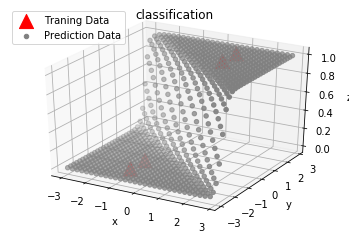

In [6]:
""" 构造预测集数据 """
delta = 0.2
px = np.arange(-3.0, 3.0, delta)
py = np.arange(-3.0, 3.0, delta)
px, py = np.meshgrid(px, py)
px = px.reshape((px.size, 1))
py = py.reshape((py.size, 1))
pz = np.hstack((np.hstack((np.ones((px.size, 1)), px)), py))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 1], X_train[:, 2], y_train, color='red', marker='^', s=200, label='Traning Data')  # plot训练集
ax.scatter(px, py, (hypothesis(pz, theta_opt.x)), color='gray', label='Prediction Data')  # plot预测集, 分类时加上 np.around
ax.legend(loc=2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('classification')
plt.show()